# Exploratory Data Analysis on a sample of Albuquerque Vehicle Emissions Database (VED)<br>

Note: The sample data was preprocessed by my mentors<br>

## Background Information on Dataset<br>
source: 
(http://data.cabq.gov/airquality/vehicleemissions/VehicleEmissionsCY_CABQ-en-us.csv) CY = Century, Year
The VED records every emissions test from all analyzers in the program.
An emissions test is mandatory in order to register with the MVD (Motor Vehicle Division).
Start Date: 2/6/2004 10:05:00

Abbreviations:<br>
EIS = Emissions Inspection System<br>
VPMD = Vehicle Pollution Management Division<br>
EHD = Environmental Health Department<br>
VIR = Vehicle Inspection Report<br>
VID = Vehicle Information Database<br>

Date Format = MM/DD/YYYY HH:MM:SS

Data is entered by emissions inspectors.

Four-Gas Emissions test consists of a probe in the exhaust pipe measuring CO2 O2 and HC while car is running or idle.<br>
OBDII test consists of connecting a cable to the car's own diagnostic system and getting the readings.<br>
A visual inspections consists of eyeballing the relevant car part.

Total test duration is approximately 10 minutes.

In [2]:
import pandas as pd
from pathlib import Path
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="darkgrid")

In [3]:
#load my pickled df with categories set
df_samp = pd.read_pickle("data/eeva_samp_df.pkl")

Loading data<br>Loading Metadata<br>Setting categories<br>Saving dataframe information<br>Pickling dataframe

In [2]:
META_DIR = Path("data/2021_meta_table.csv")
DATA_DIR = Path("data/sample201320.csv")
df_meta = pd.read_csv(META_DIR, skipinitialspace=True, sep=",")
df_samp = pd.read_csv(DATA_DIR, skipinitialspace=True)

/Users/hanbo/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3156: DtypeWarning: Columns (7,18,26,108,109,113) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df_meta.head()

,Field Name,Format,Description,Use
0,RecordID,Number,Unique Record ID for EIS SQL table Long Integer,Include
1,RECORD_NUM,Number,Unique Record ID for EIS table on analyzer Lon...,Exclude
2,VIR_CERT_NUMBER,Text,Unique ID for VIR Certification Number 8 Char.,Maybe
3,STATION_NUM,Text,Unique Station ID number 5 Character,Include
4,ANALYZER_NUM,Text,Last 3 digits of analyzer serial number 3 Char...,Include


In [4]:
df_samp.head()

,RECORD_NUM,VIR_CERT_NUMBER,STATION_NUM,ANALYZER_NUM,INSPECTOR_NUM,TEST_TYPE,VID_TEST_TYPE,TEST_SDATE,TEST_EDATE,VIN,...,E_IDLE_HC_RESULT,MECHANIC_LAST_NAME,MECHANIC_FIRST_NAME,MECHANIC_MIDDLE_INIT,ENGINE_SIZE_ORIG,FAILED_IDLE_RPM,SENTTOVID,Station_License_Number,Analyzer_Number,Insert_DateTime
RecordID,,,,,,,,,,,,,,,,,,,,,
2690332,10433,6878785.0,IS311,W028,AC084149,A,A,2013-03-04 10:11:00,2013-03-04 10:14:00,1G4HP52K45U160372,...,N,Huber,Bryan,S,<NA>,NaN,0,IS311,W028,2013-03-04 16:26:26
2804644,18225,6979071.0,IR317,W039,37826481,I,I,2013-07-22 16:55:00,2013-07-22 16:56:00,3VWSF71K66M706988,...,N,NGUYEN,HANH,A,2.5L,NaN,0,IR317,W039,2013-07-22 17:41:06
2779074,20815,6962743.0,IS435,W134,11714840,I,I,2013-06-18 12:45:00,2013-06-18 12:47:00,1FTRX17W43NA86035,...,N,ANDERSON,MICHAEL,S,<NA>,NaN,0,IS435,W134,2013-06-19 07:34:42
2761810,12214,6951801.0,IS311,W028,AC084149,I,I,2013-05-29 16:17:00,2013-05-29 16:18:00,JTEEP21A560170542,...,N,Huber,Bryan,S,<NA>,NaN,0,IS311,W028,2013-05-29 15:40:15
2733004,13457,6906983.0,IS404,W042,34899991,I,I,2013-04-22 15:54:00,2013-04-22 15:58:00,1G1ZT52865F313274,...,N,JOE,PRESTON,A,<NA>,NaN,0,IS404,W042,2013-04-22 16:24:42


In [5]:
df_samp.columns == df_meta['Field Name']

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [6]:
info_output = open("data/info_output_before.txt", "w")
df_samp.info(verbose=True, buf=info_output, memory_usage=False, show_counts=True)
info_output.close()
#non-null counts and datatype before manual type setting are stored in info_output file

In [7]:
df_samp.info(verbose=True, memory_usage=False, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193310 entries, 0 to 193309
Data columns (total 127 columns):
 #    Column                  Non-Null Count   Dtype  
---   ------                  --------------   -----  
 0    RecordID                193310 non-null  int64  
 1    RECORD_NUM              193310 non-null  int64  
 2    VIR_CERT_NUMBER         187570 non-null  float64
 3    STATION_NUM             193310 non-null  object 
 4    ANALYZER_NUM            193310 non-null  object 
 5    INSPECTOR_NUM           193310 non-null  object 
 6    TEST_TYPE               193258 non-null  object 
 7    VID_TEST_TYPE           107990 non-null  object 
 8    TEST_SDATE              193310 non-null  object 
 9    TEST_EDATE              193310 non-null  object 
 10   VIN                     193310 non-null  object 
 11   VIN_SOURCE              193310 non-null  object 
 12   VEH_LICENSE             193076 non-null  object 
 13   GVW_TYPE                190897 non-null  float64
 14   GV

In [8]:
#set appropriate data types
cols_to_category = ['RecordID', 'RECORD_NUM', 'VIR_CERT_NUMBER', 'STATION_NUM', 'ANALYZER_NUM',
                   'INSPECTOR_NUM', 'TEST_TYPE', 'VID_TEST_TYPE', 'VIN', 'VIN_SOURCE',
                    'VEH_LICENSE', 'GVW_TYPE', 'MAKE', 'MODEL', 'TRANS_TYPE',
                    'DUAL_EXHAUST', 'FUEL_TYPE', 'VEHICLE_TYPE', 'ZIP_CODE', 'CERTIFICATION',
                    'ESC', 'VRT_RECORD_ID', 'E_TEST_SEQUENCE', 'E_PRECOND_PROCEDURE', 'E_RESULT_STRING',
                    'V_SMOKE1', 'V_SMOKE2', 'V_GASCAP', 'V_CAT', 'V_RESULT',
                    'KOEO_RESULT', 'KOER_RESULT', 'OBD_RDY_MISFIRE', 'OBD_RDY_FUEL','OBD_RDY_COMPONENT',
                    'OBD_RDY_CAT', 'OBD_RDY_CAT_HEATED', 'OBD_RDY_EVAP', 'OBD_RDY_SEC_AIR', 'OBD_RDY_AIR_COND',
                    'OBD_RDY_O2_SENSOR', 'OBD_RDY_O2_HEATER', 'OBD_RDY_EGR' 'OBD_RDY_RESULT', 'OBD_PID',
                    'OBD_PCM_ID', 'OBD_VIN', 'OBD_FLT_CODES', 'OBD_FLT_RESULT', 'OBD_MIL_STATUS',
                    'OBD_RESULT', 'ONLINE_STATUS', 'OFFLINE_REASON_CODE', 'ABORT_CODE', 'SOFTWARE_VERSION',
                    'OVERALL_RESULT', 'R_EGR', 'R_ELECTRICAL', 'R_EVAP_CONTROL', 'R_EXHAUST',
                    'R_IGNITION', 'R_PCV', 'R_OTHER', 'SentToWW', 'ABORT_CODE_OTHER_DESC',
                    'OBDII_AFFECT_OVERALL', 'E_HIGH_CO_RESULT', 'E_HIGH_HC_RESULT', 'E_IDLE_CO_RESULT',
                    'E_IDLE_HC_RESULT', 'FAILED_IDLE_RPM', 'SENTTOVID', 'Station_License_Number', 'Analyzer_Number',
                    'MODEL_YEAR', 'CYL', 'R_INTAKE', 'R_ENGINE', 'OBD_RDY_RESULT'
                   ]
cols_to_datetime = ['TEST_SDATE', 'TEST_EDATE', 'Insert_DateTime']
cols_to_string = ['INSP_COMMENTS', 'MECHANIC_LAST_NAME', 'MECHANIC_FIRST_NAME', 'MECHANIC_MIDDLE_INIT',
                 'ENGINE_SIZE_ORIG']
#all other columns are int or float

In [9]:
for col in df_samp.columns:
    if col in cols_to_category:
        df_samp[col] = df_samp[col].astype('category')
    elif col in cols_to_datetime:
        df_samp[col] = pd.to_datetime(df_samp[col])
    elif col in cols_to_string:
        df_samp[col] = df_samp[col].astype('string')

In [10]:
info_output = open("data/info_output_after.txt", "w")
df_samp.info(verbose=True, buf=info_output, memory_usage=False, show_counts=True)
info_output.close()
#non-null counts and datatype after manual type setting are stored in info_output file

In [5]:
#check data type conversion
df_samp.info(verbose=True, memory_usage=False, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 187503 entries, 0 to 193309
Data columns (total 127 columns):
 #    Column                  Non-Null Count   Dtype         
---   ------                  --------------   -----         
 0    RecordID                187503 non-null  category      
 1    RECORD_NUM              187503 non-null  category      
 2    VIR_CERT_NUMBER         187503 non-null  category      
 3    STATION_NUM             187503 non-null  category      
 4    ANALYZER_NUM            187503 non-null  category      
 5    INSPECTOR_NUM           187503 non-null  category      
 6    TEST_TYPE               187503 non-null  category      
 7    VID_TEST_TYPE           107041 non-null  category      
 8    TEST_SDATE              187503 non-null  datetime64[ns]
 9    TEST_EDATE              187503 non-null  datetime64[ns]
 10   VIN                     187503 non-null  category      
 11   VIN_SOURCE              187503 non-null  category      
 12   VEH_LICENSE   

In [4]:
y = 'OVERALL_RESULT'
print('before dropping\n', df_samp[y].value_counts())
df_samp = df_samp[~df_samp.OVERALL_RESULT.isin(['A','O'])]
print('after dropping\n', df_samp[y].value_counts())

before dropping
 P    173762
F     13741
A      5805
O         2
Name: OVERALL_RESULT, dtype: int64
after dropping
 P    173762
F     13741
A         0
O         0
Name: OVERALL_RESULT, dtype: int64


In [9]:
df_samp.set_index('RecordID', inplace=True)
df_samp.head()

,RECORD_NUM,VIR_CERT_NUMBER,STATION_NUM,ANALYZER_NUM,INSPECTOR_NUM,TEST_TYPE,VID_TEST_TYPE,TEST_SDATE,TEST_EDATE,VIN,...,E_IDLE_HC_RESULT,MECHANIC_LAST_NAME,MECHANIC_FIRST_NAME,MECHANIC_MIDDLE_INIT,ENGINE_SIZE_ORIG,FAILED_IDLE_RPM,SENTTOVID,Station_License_Number,Analyzer_Number,Insert_DateTime
RecordID,,,,,,,,,,,,,,,,,,,,,
2690332,10433,6878785.0,IS311,W028,AC084149,A,A,2013-03-04 10:11:00,2013-03-04 10:14:00,1G4HP52K45U160372,...,N,Huber,Bryan,S,<NA>,NaN,0,IS311,W028,2013-03-04 16:26:26
2804644,18225,6979071.0,IR317,W039,37826481,I,I,2013-07-22 16:55:00,2013-07-22 16:56:00,3VWSF71K66M706988,...,N,NGUYEN,HANH,A,2.5L,NaN,0,IR317,W039,2013-07-22 17:41:06
2779074,20815,6962743.0,IS435,W134,11714840,I,I,2013-06-18 12:45:00,2013-06-18 12:47:00,1FTRX17W43NA86035,...,N,ANDERSON,MICHAEL,S,<NA>,NaN,0,IS435,W134,2013-06-19 07:34:42
2761810,12214,6951801.0,IS311,W028,AC084149,I,I,2013-05-29 16:17:00,2013-05-29 16:18:00,JTEEP21A560170542,...,N,Huber,Bryan,S,<NA>,NaN,0,IS311,W028,2013-05-29 15:40:15
2733004,13457,6906983.0,IS404,W042,34899991,I,I,2013-04-22 15:54:00,2013-04-22 15:58:00,1G1ZT52865F313274,...,N,JOE,PRESTON,A,<NA>,NaN,0,IS404,W042,2013-04-22 16:24:42


In [10]:
#pickle my df
df_samp.to_pickle("data/eeva_samp_df.pkl")

# Generate descriptive statistics for categorical, numerical, date/time data

In [12]:
categorical_descriptives = df_samp.describe(include=['category'])

In [13]:
categorical_descriptives.iloc[:,0:10]

,RecordID,RECORD_NUM,VIR_CERT_NUMBER,STATION_NUM,ANALYZER_NUM,INSPECTOR_NUM,TEST_TYPE,VID_TEST_TYPE,VIN,VIN_SOURCE
count,193310,193310,187570.0,193310,193310,193310,193258,107990,193310,193310
unique,193310,31141,187339.0,183,186,1539,2,2,86612,2
top,2641854,249,10068344.0,IR317,W039,ACP84832,I,I,3VWTE29M0YM179467,S
freq,1,40,3.0,12753,6522,4771,188529,105921,14,175820


In [14]:
categorical_descriptives.iloc[:,10:20]

,VEH_LICENSE,GVW_TYPE,MODEL_YEAR,MAKE,MODEL,CYL,TRANS_TYPE,DUAL_EXHAUST,FUEL_TYPE,VEHICLE_TYPE
count,193076,190897.0,193310,192359,192354,192328,192328,192177,192177,193310
unique,117309,3.0,44,92,2553,20,2,2,7,8
top,00928,1.0,2007,FORD,CAMRY,4,A,N,G,1
freq,604,151406.0,12318,31037,4541,50999,173500,191089,188880,87824


In [15]:
categorical_descriptives.iloc[:,20:30]

,ZIP_CODE,CERTIFICATION,ESC,VRT_RECORD_ID,E_TEST_SEQUENCE,E_PRECOND_PROCEDURE,E_RESULT_STRING,V_SMOKE1,V_SMOKE2,V_GASCAP
count,192177.0,192383,191763.0,193310,193310,193310,193310,193310,193310,193310
unique,602.0,5,15.0,8054,7,4,3,3,3,5
top,87114.0,C,20.0,0,1,1,N,N,P,N
freq,10003.0,122751,90407.0,92634,188848,188644,180719,180265,187481,112890


In [16]:
categorical_descriptives.iloc[:,30:40]

,V_CAT,V_RESULT,KOEO_RESULT,KOER_RESULT,OBD_RDY_MISFIRE,OBD_RDY_FUEL,OBD_RDY_COMPONENT,OBD_RDY_CAT,OBD_RDY_CAT_HEATED,OBD_RDY_EVAP
count,193310,193310,175328,174880,175070.0,175070.0,175070.0,175070.0,175070.0,175070.0
unique,3,3,2,3,5.0,6.0,4.0,6.0,4.0,6.0
top,P,P,P,P,1.0,1.0,1.0,1.0,0.0,1.0
freq,188645,187139,174880,172126,173784.0,172126.0,173802.0,158264.0,174116.0,139283.0


In [17]:
categorical_descriptives.iloc[:,40:50]

,OBD_RDY_SEC_AIR,OBD_RDY_AIR_COND,OBD_RDY_O2_SENSOR,OBD_RDY_O2_HEATER,OBD_RDY_RESULT,OBD_PID,OBD_PCM_ID,OBD_VIN,OBD_FLT_CODES,OBD_FLT_RESULT
count,175070.0,175070.0,175070.0,175070.0,175070,175113.0,175070,126727,15748,175197
unique,6.0,4.0,6.0,6.0,3,100.0,46,62382,4341,2
top,0.0,0.0,1.0,1.0,P,22.0,E8,1FTZ1FTZ1FTZ1FTZ1,P0420,P
freq,162696.0,174426.0,163949.0,164014.0,169633,13977.0,76125,61,698,159449


In [18]:
categorical_descriptives.iloc[:,50:60]

,OBD_MIL_STATUS,OBD_RESULT,ONLINE_STATUS,OFFLINE_REASON_CODE,ABORT_CODE,SOFTWARE_VERSION,OVERALL_RESULT,R_EGR,R_ELECTRICAL,R_EVAP_CONTROL
count,175070.0,175305,193310,193310,5784.0,193310,193310,196,324,854
unique,2.0,6,2,1,21.0,12,4,2,2,2
top,1.0,P,1,0,99.0,502,P,Y,Y,Y
freq,169701.0,164845,171868,193310,5150.0,55293,173762,182,312,834


In [19]:
categorical_descriptives.iloc[:,60:70]

,R_EXHAUST,R_IGNITION,R_INTAKE,R_ENGINE,R_PCV,R_OTHER,SentToWW,ABORT_CODE_OTHER_DESC,OBDII_AFFECT_OVERALL,E_HIGH_CO_RESULT
count,225,185,284,55,44,2958,193310,1495,98629,188956
unique,2,2,2,2,2,2,1,889,2,3
top,Y,Y,Y,Y,Y,Y,0,OBDII Secondary Readiness Abort,N,N
freq,206,174,272,45,34,2765,193310,104,92699,176232


In [20]:
categorical_descriptives.iloc[:,70:80]

,E_HIGH_HC_RESULT,E_IDLE_CO_RESULT,E_IDLE_HC_RESULT,FAILED_IDLE_RPM,SENTTOVID,Station_License_Number,Analyzer_Number
count,188956,188956,188956,269,193310,193310,193310
unique,3,3,3,1,1,183,187
top,N,N,N,T,0,IR317,W039
freq,176232,176348,176348,269,193310,12753,6522


Observations from categorical descriptive statistics:<br> Many variables have missing values.<br>

In [21]:
numerical_descriptives = df_samp.describe(include=[np.number])

In [23]:
numerical_descriptives.iloc[:,0:10]

,GVWR,ENGINE_SIZE,ODOMETER,EMISS_COST,E_HIGH_DCF,E_HIGH_RPM,E_HIGH_CO2,E_HIGH_O2,E_HIGH_HC,E_HIGH_HC_DCF
count,193310.000000,193310.000000,1.933100e+05,189637.000000,193310.000000,193310.000000,193310.000000,193310.000000,193310.000000,193310.000000
mean,4469.791718,3332.197170,1.101835e+05,20.419966,0.073353,162.309881,0.907052,0.137316,4.927821,5.718147
std,1871.669467,1311.405031,2.204303e+05,7.153013,0.279971,612.748680,4.521935,1.425839,101.312498,129.652671
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3375.000000,2400.000000,5.324400e+04,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4450.000000,3300.000000,9.742600e+04,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5644.000000,4000.000000,1.453422e+05,24.990000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,10000.000000,8400.000000,9.999999e+06,79.950000,2.700000,2795.000000,1121.280000,234.470000,22588.000000,24827.000000


In [24]:
numerical_descriptives.iloc[:,10:20]

,E_HIGH_HC_LIMIT,E_HIGH_CO,E_HIGH_CO_DCF,E_HIGH_CO_LIMIT,E_IDLE_DCF,E_IDLE_RPM,E_IDLE_CO2,E_IDLE_O2,E_IDLE_HC,E_IDLE_HC_DCF
count,193310.000000,193310.000000,193310.000000,193310.000000,193310.000000,193310.000000,193310.000000,193310.000000,193310.000000,193310.000000
mean,105.931819,0.027652,0.029991,1.011699,0.075264,54.204599,0.866564,0.159969,6.568920,7.812420
std,27.810305,0.312051,0.332094,0.149385,0.292694,235.537360,4.701277,1.534013,64.699042,85.657444
min,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000
25%,100.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,100.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,100.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,500.000000,14.200000,14.690000,5.000000,2.620000,27560.000000,1466.300000,287.239990,5971.000000,10078.000000


In [25]:
numerical_descriptives.iloc[:,20:30]

,E_IDLE_HC_LIMIT,E_IDLE_CO,E_IDLE_CO_DCF,E_IDLE_CO_LIMIT,E_HIGH_DCF_2,E_HIGH_RPM_2,E_HIGH_CO2_2,E_HIGH_O2_2,E_HIGH_HC_2,E_HIGH_HC_DCF_2
count,193310.000000,193310.000000,193310.000000,193310.000000,193310.000000,193310.000000,193310.000000,193310.000000,193310.000000,193310.000000
mean,105.931819,0.020324,0.022681,1.009395,0.005332,11.631504,0.058150,0.011532,1.270007,1.444705
std,27.810305,0.268015,0.293224,0.139087,0.078560,169.392097,0.906168,0.306965,25.149571,28.816518
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,100.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,100.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,100.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,500.000000,12.180000,13.480000,5.000000,2.640000,2771.000000,145.820010,40.009998,1762.000000,1772.000000


In [26]:
numerical_descriptives.iloc[:,30:40]

,E_HIGH_CO_2,E_HIGH_CO_DCF_2,E_IDLE_DCF_2,E_IDLE_RPM_2,E_IDLE_CO2_2,E_IDLE_O2_2,E_IDLE_HC_2,E_IDLE_HC_DCF_2,E_IDLE_CO_2,E_IDLE_CO_DCF_2
count,193310.000000,193310.000000,193310.000000,193310.000000,193310.000000,193310.000000,193310.000000,193310.000000,193310.000000,193310.000000
mean,0.010292,0.011146,0.014710,9.916916,0.153654,0.037645,3.567193,4.234214,0.013379,0.015127
std,0.200072,0.212359,0.134787,90.354439,1.506211,0.748109,40.003307,48.115227,0.210878,0.232015
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.600000,9.000000,2.520000,1190.000000,259.739990,224.509990,1766.000000,1766.000000,8.740000,8.870000


In [27]:
numerical_descriptives.iloc[:,40:50]

,OBD_RDY_EGR,R_TOTAL_COST
count,175070.000000,4535.000000
mean,0.688393,74.304741
std,0.548635,325.907929
min,0.000000,0.000000
25%,0.000000,0.000000
50%,1.000000,10.000000
75%,1.000000,25.000000
max,5.000000,11900.000000


In [29]:
date_descriptives = df_samp.describe(include=[np.datetime64], datetime_is_numeric=True)

In [30]:
date_descriptives

,TEST_SDATE,TEST_EDATE,Insert_DateTime
count,193310,193310,193310
mean,2016-12-26 21:30:44.246521344,2016-12-26 21:33:58.379923712,2016-12-26 23:40:15.174424320
min,2013-01-01 14:10:00,2013-01-01 14:11:00,2013-01-02 09:26:04
25%,2014-12-31 14:47:45,2014-12-31 14:50:00,2014-12-31 14:38:38.500000
50%,2016-12-30 12:48:00,2016-12-30 12:49:00,2016-12-30 12:07:34.500000
75%,2019-01-08 12:14:24.750000128,2019-01-08 12:19:08,2019-01-08 11:19:53.249999872
max,2020-12-31 17:39:11,2020-12-31 17:40:36,2021-01-04 10:24:40


Make groups of variables based on theme<br>
#Station and Analyzer Information<br>
#Car Identifiers<br>
#Car Features<br>
#'E-' Features<br>
#Visual Inspection Data<br>
#OBD Data<br>
#Repairs Information<br>
#Target<br>

In [8]:
emission_vars = []
for col in list(df_samp.columns):
    if col.startswith("E_"):
        emission_vars.append(col)
#Emissions Test Data
emission_vars

['E_TEST_SEQUENCE',
 'E_PRECOND_PROCEDURE',
 'E_HIGH_DCF',
 'E_HIGH_RPM',
 'E_HIGH_CO2',
 'E_HIGH_O2',
 'E_HIGH_HC',
 'E_HIGH_HC_DCF',
 'E_HIGH_HC_LIMIT',
 'E_HIGH_CO',
 'E_HIGH_CO_DCF',
 'E_HIGH_CO_LIMIT',
 'E_IDLE_DCF',
 'E_IDLE_RPM',
 'E_IDLE_CO2',
 'E_IDLE_O2',
 'E_IDLE_HC',
 'E_IDLE_HC_DCF',
 'E_IDLE_HC_LIMIT',
 'E_IDLE_CO',
 'E_IDLE_CO_DCF',
 'E_IDLE_CO_LIMIT',
 'E_HIGH_DCF_2',
 'E_HIGH_RPM_2',
 'E_HIGH_CO2_2',
 'E_HIGH_O2_2',
 'E_HIGH_HC_2',
 'E_HIGH_HC_DCF_2',
 'E_HIGH_CO_2',
 'E_HIGH_CO_DCF_2',
 'E_IDLE_DCF_2',
 'E_IDLE_RPM_2',
 'E_IDLE_CO2_2',
 'E_IDLE_O2_2',
 'E_IDLE_HC_2',
 'E_IDLE_HC_DCF_2',
 'E_IDLE_CO_2',
 'E_IDLE_CO_DCF_2',
 'E_RESULT_STRING',
 'E_HIGH_CO_RESULT',
 'E_HIGH_HC_RESULT',
 'E_IDLE_CO_RESULT',
 'E_IDLE_HC_RESULT']

In [34]:
df_samp[emission_vars].describe(include=['category'])

,E_TEST_SEQUENCE,E_PRECOND_PROCEDURE,E_RESULT_STRING,E_HIGH_CO_RESULT,E_HIGH_HC_RESULT,E_IDLE_CO_RESULT,E_IDLE_HC_RESULT
count,193310,193310,193310,188956,188956,188956,188956
unique,7,4,3,3,3,3,3
top,1,1,N,N,N,N,N
freq,188848,188644,180719,176232,176232,176348,176348


E_TEST_SEQUENCE contains 7 unique values when it should only contain two (0,1)<br>
E_PRECOND_PROCEDURE contains 4 unique values when it should only contain two (0,1)<br>
E_RESULT_STRING contains 3 unique values when it should only contain two (P, F), third value is N (Not applicable?)<br>

In [9]:
#add countplots
emission_cat = df_samp[emission_vars].describe(include=['category']).columns
print(emission_cat)

Index(['E_TEST_SEQUENCE', 'E_PRECOND_PROCEDURE', 'E_RESULT_STRING',
       'E_HIGH_CO_RESULT', 'E_HIGH_HC_RESULT', 'E_IDLE_CO_RESULT',
       'E_IDLE_HC_RESULT'],
      dtype='object')


In [ ]:
import matplotlib.pyplot as plt
# Define the number of rows and columns you want
n_rows=3
n_cols=3
# Create the subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols)

In [36]:
df_samp[emission_vars].describe(exclude=['category'])

,E_HIGH_DCF,E_HIGH_RPM,E_HIGH_CO2,E_HIGH_O2,E_HIGH_HC,E_HIGH_HC_DCF,E_HIGH_HC_LIMIT,E_HIGH_CO,E_HIGH_CO_DCF,E_HIGH_CO_LIMIT,...,E_HIGH_CO_2,E_HIGH_CO_DCF_2,E_IDLE_DCF_2,E_IDLE_RPM_2,E_IDLE_CO2_2,E_IDLE_O2_2,E_IDLE_HC_2,E_IDLE_HC_DCF_2,E_IDLE_CO_2,E_IDLE_CO_DCF_2
count,193310.000000,193310.000000,193310.000000,193310.000000,193310.000000,193310.000000,193310.000000,193310.000000,193310.000000,193310.000000,...,193310.000000,193310.000000,193310.000000,193310.000000,193310.000000,193310.000000,193310.000000,193310.000000,193310.000000,193310.000000
mean,0.073353,162.309881,0.907052,0.137316,4.927821,5.718147,105.931819,0.027652,0.029991,1.011699,...,0.010292,0.011146,0.014710,9.916916,0.153654,0.037645,3.567193,4.234214,0.013379,0.015127
std,0.279971,612.748680,4.521935,1.425839,101.312498,129.652671,27.810305,0.312051,0.332094,0.149385,...,0.200072,0.212359,0.134787,90.354439,1.506211,0.748109,40.003307,48.115227,0.210878,0.232015
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.700000,2795.000000,1121.280000,234.470000,22588.000000,24827.000000,500.000000,14.200000,14.690000,5.000000,...,8.600000,9.000000,2.520000,1190.000000,259.739990,224.509990,1766.000000,1766.000000,8.740000,8.870000


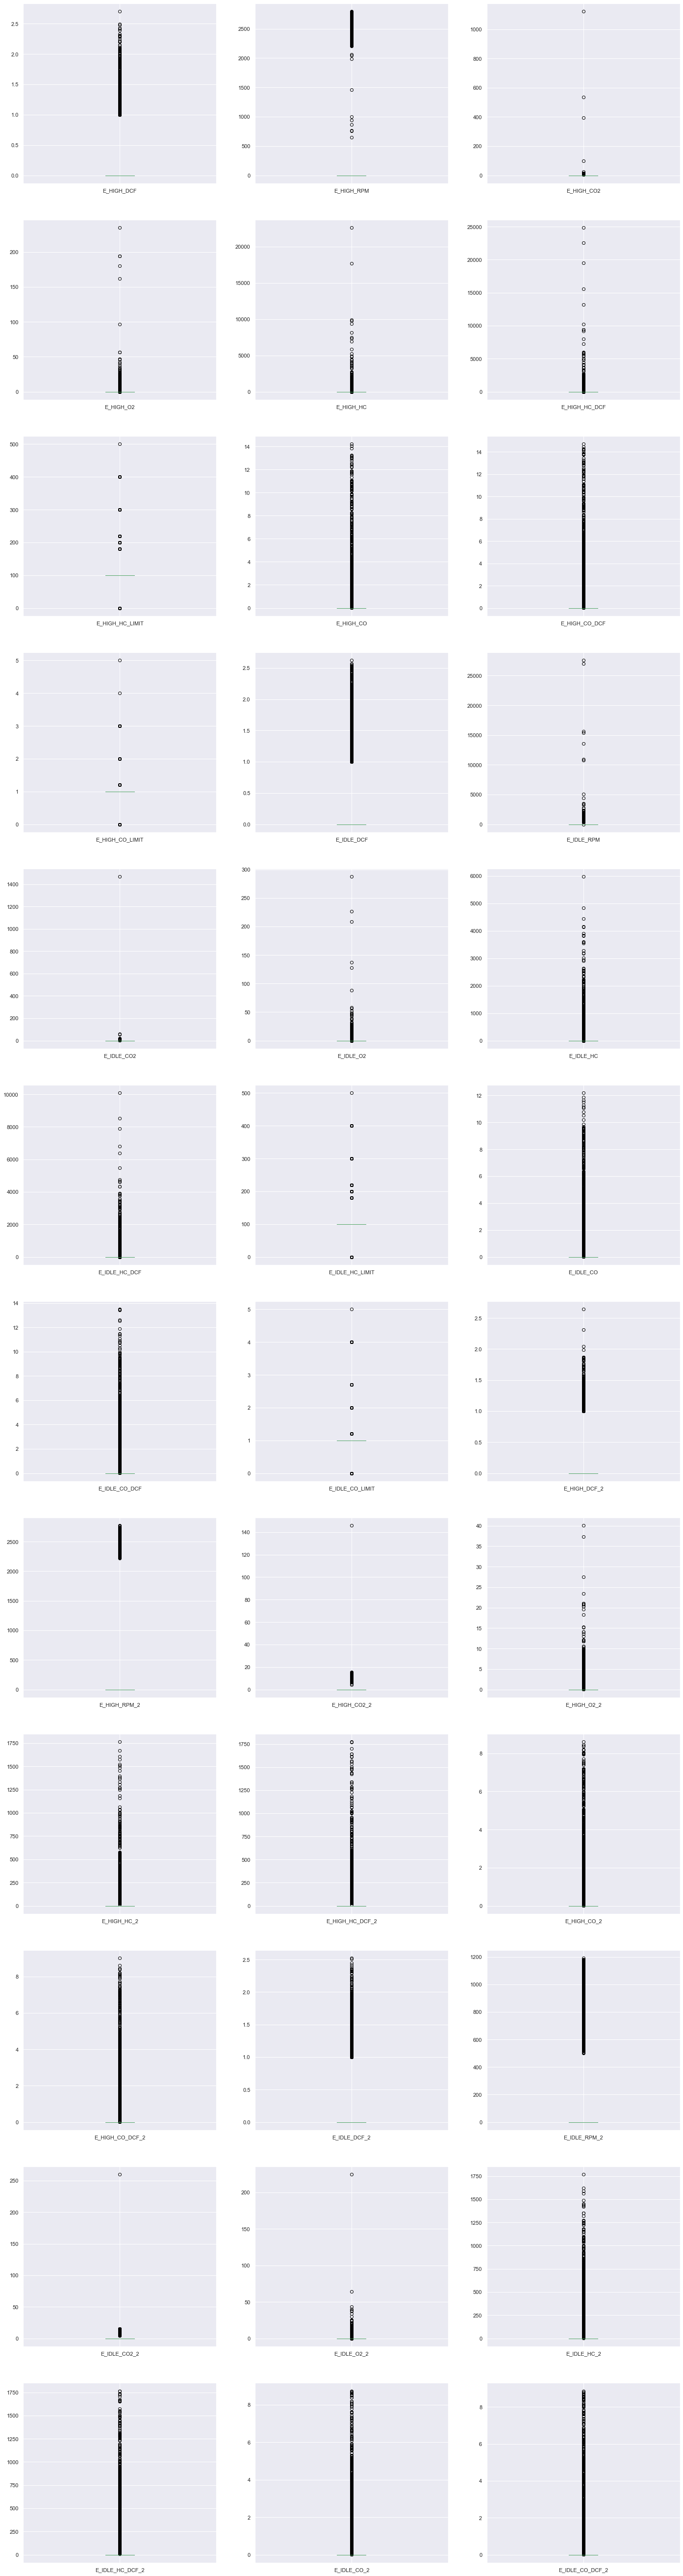

In [35]:
e_vars_boxplot = df_samp[emission_vars].plot(kind='box', subplots=True, layout=(12,3), figsize=(24,96))
#plt.savefig('data/e_vars_boxplot.png')

In [37]:
#create repairs variable group
repairs_vars = []
for col in list(df_samp.columns):
    if col.startswith("R_"):
        repairs_vars.append(col)
#Emissions Test Data
repairs_vars

['R_TOTAL_COST',
 'R_EGR',
 'R_ELECTRICAL',
 'R_EVAP_CONTROL',
 'R_EXHAUST',
 'R_IGNITION',
 'R_INTAKE',
 'R_ENGINE',
 'R_PCV',
 'R_OTHER']

In [38]:
df_samp[repairs_vars].describe(include=['category'])

,R_EGR,R_ELECTRICAL,R_EVAP_CONTROL,R_EXHAUST,R_IGNITION,R_INTAKE,R_ENGINE,R_PCV,R_OTHER
count,196,324,854,225,185,284,55,44,2958
unique,2,2,2,2,2,2,2,2,2
top,Y,Y,Y,Y,Y,Y,Y,Y,Y
freq,182,312,834,206,174,272,45,34,2765


In [39]:
df_samp[repairs_vars].describe(exclude=['category'])

,R_TOTAL_COST
count,4535.000000
mean,74.304741
std,325.907929
min,0.000000
25%,0.000000
50%,10.000000
75%,25.000000
max,11900.000000


<AxesSubplot:>

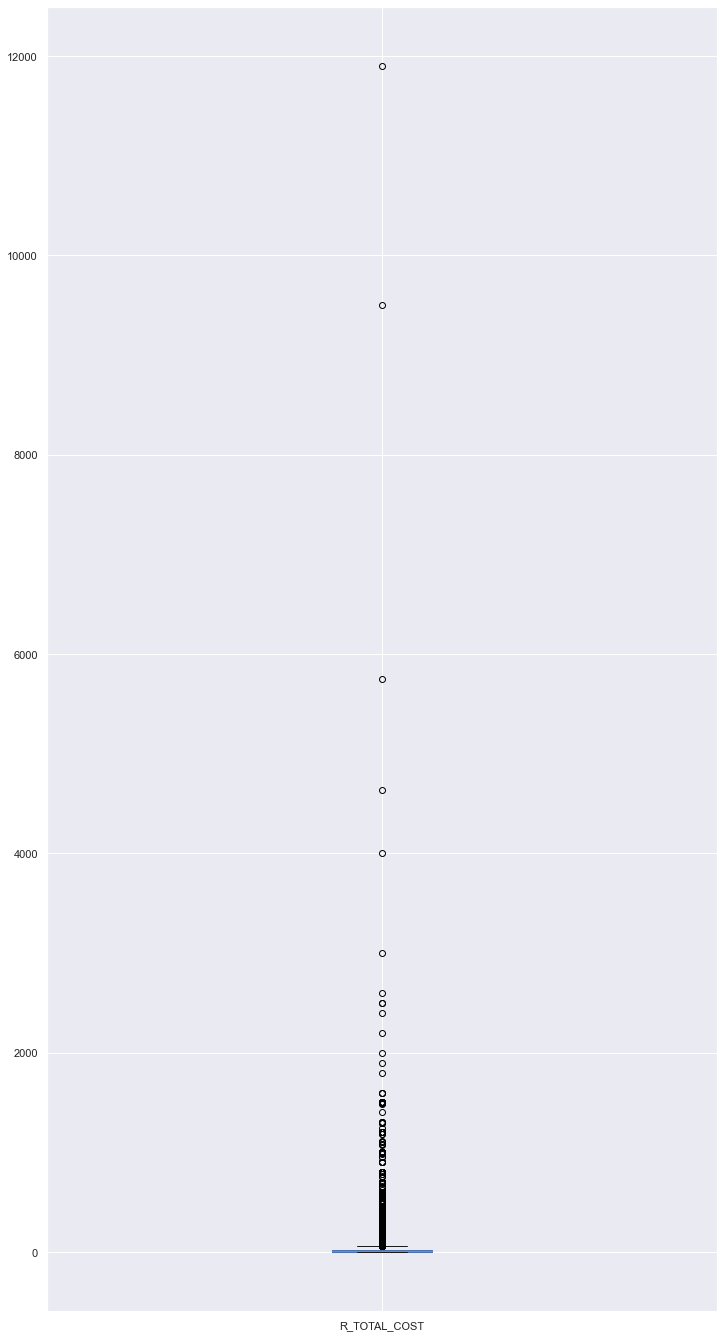

In [42]:
df_samp['R_TOTAL_COST'].plot(kind='box', layout=(6,12), figsize=(12,24))

# Vehicle related features

Features to keep/drop/maybe for first model: tbd
<br>Check for typos in car make and model <br>Write function to clean the model and make cols<br>Questions to answer with team:<br>1. Which of the original features to keep?<br>2. Which features to create?

In [4]:
df_samp[['MAKE', 'MODEL', 'MODEL_YEAR']].info()
#two null values for MODEL

<class 'pandas.core.frame.DataFrame'>
CategoricalIndex: 187503 entries, 2690332 to 4844706
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   MAKE        187503 non-null  category
 1   MODEL       187501 non-null  category
 2   MODEL_YEAR  187503 non-null  category
dtypes: category(3)
memory usage: 7.0 MB


## How many unique MAKEs and MODELs are there?

In [5]:
print(f"{df_samp['MAKE'].nunique()} unique MAKES")
print(f"{df_samp['MODEL'].nunique()} unique MODELS")
print(f"{df_samp['MODEL_YEAR'].nunique()} unique MODEL_YEARs")


92 unique MAKES
2537 unique MODELS
43 unique MODEL_YEARs


## How many MAKE values equal MODEL values?

In [17]:
#this loop is not doing what I expect
mixed_values = []
my_make = list(df_samp['MAKE'])
my_model = list(df_samp['MODEL'])
for make in my_make:
    if make in my_model:
        mixed_values.append(make)
mixed_values

['BMW',
 'SCION',
 'HYUNDAI',
 'HYUNDAI',
 'BMW',
 'VOLVO',
 'HONDA',
 'HONDA',
 'HONDA',
 'HONDA',
 'HYUNDAI',
 'HONDA',
 'HONDA',
 'HONDA',
 'HONDA',
 'HONDA',
 'HONDA',
 'HONDA',
 'HONDA',
 'MAZDA',
 'HONDA',
 'HONDA',
 'HYUNDAI',
 'MINI',
 'HYUNDAI',
 'HONDA',
 'HYUNDAI',
 'HONDA',
 'HONDA',
 'HONDA',
 'HONDA',
 'BMW',
 'MAZDA',
 'VOLVO',
 'HYUNDAI',
 'HYUNDAI',
 'HONDA',
 'HYUNDAI',
 'HONDA',
 'HONDA',
 'VOLVO',
 'BMW',
 'HYUNDAI',
 'HONDA',
 'HONDA',
 'GEO',
 'HONDA',
 'HONDA',
 'SCION',
 'HONDA',
 'HONDA',
 'BMW',
 'MAZDA',
 'BMW',
 'HYUNDAI',
 'HONDA',
 'HYUNDAI',
 'HYUNDAI',
 'HONDA',
 'HONDA',
 'HYUNDAI',
 'HYUNDAI',
 'HONDA',
 'HONDA',
 'HUMMER',
 'HONDA',
 'HYUNDAI',
 'HONDA',
 'SCION',
 'MAZDA',
 'VOLVO',
 'HONDA',
 'HONDA',
 'BMW',
 'HYUNDAI',
 'MAZDA',
 'MAZDA',
 'SCION',
 'HONDA',
 'HONDA',
 'HONDA',
 'HONDA',
 'MINI',
 'HYUNDAI',
 'HYUNDAI',
 'HONDA',
 'HYUNDAI',
 'HYUNDAI',
 'HONDA',
 'HONDA',
 'HONDA',
 'HYUNDAI',
 'MINI',
 'HYUNDAI',
 'HONDA',
 'HUMMER',
 'HONDA',
 

In [18]:
len(mixed_values)

30703

In [19]:
mixed_set = set(mixed_values)

In [20]:
mixed_set

{'200',
 'BMW',
 'COOPER',
 'FREIGHTLINER',
 'GENESIS',
 'GEO',
 'H2',
 'HONDA',
 'HUMMER',
 'HYUNDAI',
 'MAZDA',
 'MINI',
 'MINI COOPER',
 'MINICOOPER',
 'RAM',
 'RAM 1500',
 'RAM1500',
 'RANGE ROVER',
 'RANGEROVER',
 'SAAB',
 'SCION',
 'SMART',
 'SMARTPASSION',
 'TRUCK',
 'VOLVO',
 'WINNEBAGO'}

In [21]:
len(mixed_set)

26

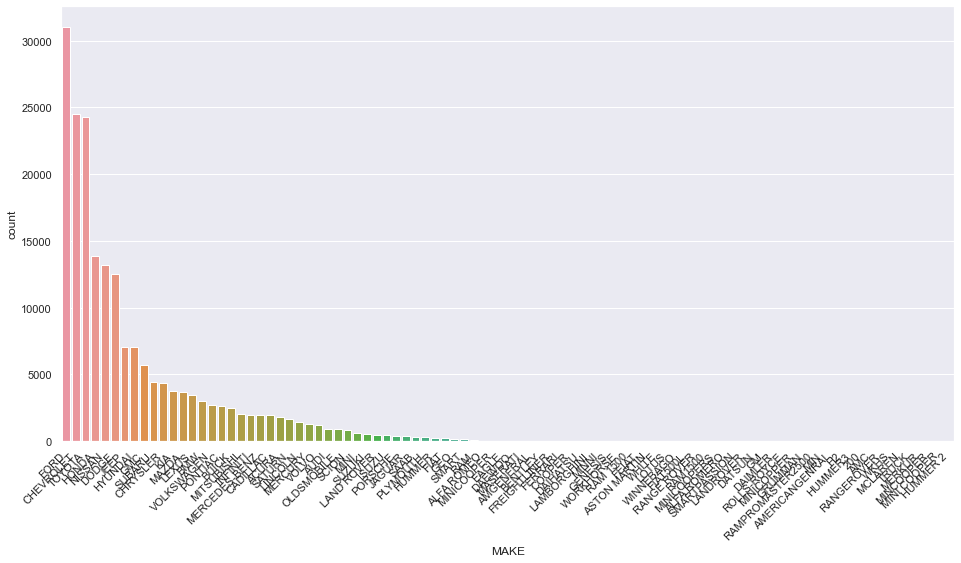

In [15]:
plt.figure(figsize=(16,8))
plot_1 = sns.countplot(x=df_samp['MAKE'], order=df_samp['MAKE'].value_counts().index)
plot_1.set_xticklabels(plot_1.get_xticklabels(), rotation=45, horizontalalignment='right')
None #don't show label object
#plt.savefig('testfig.png')

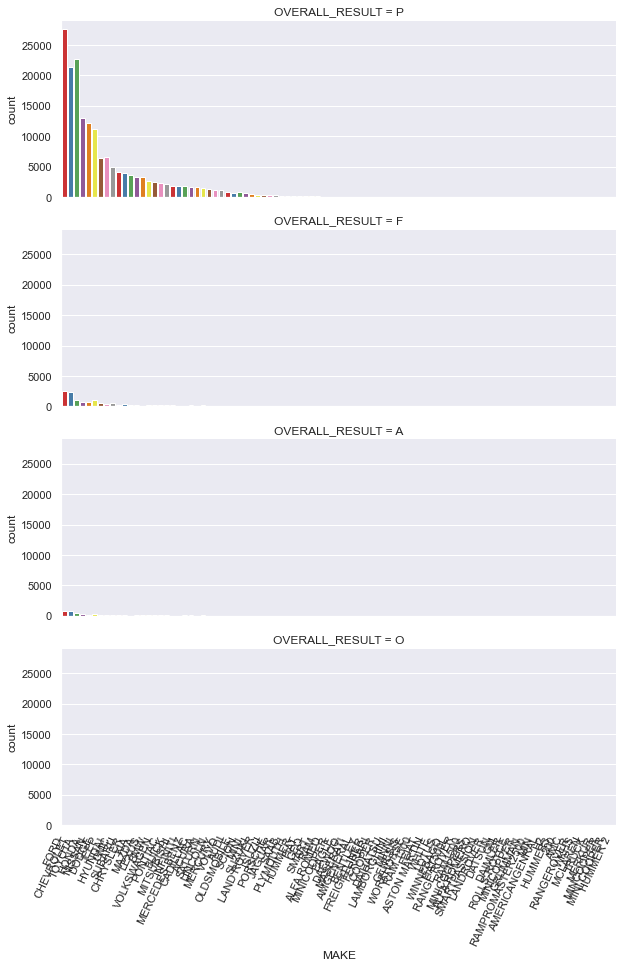

In [21]:
#grouped by plots
plot_8 = sns.catplot(
    data=df_samp,
    x='MAKE',
    kind='count',
    palette='Set1',
    row='OVERALL_RESULT',
    aspect=3,
    height=3,
    order=df_samp['MAKE'].value_counts().index
)
plot_8.set_xticklabels(rotation=65, horizontalalignment='right')
None

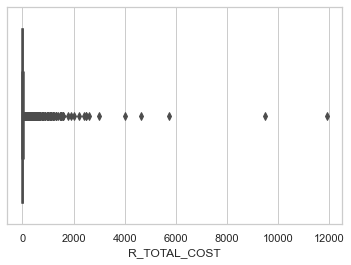

In [22]:
#boxplot r total costs
#import seaborn as sns
sns.set_theme(style="whitegrid")
plot_10 = sns.boxplot(x=df_samp['R_TOTAL_COST'])